# Import Required Libraries

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# TinyVectorDB Class Implementation

In [2]:
class TinyVectorDB:
    def __init__(self):
        self.vectors = []
        self.labels = []

    def add_vector(self, vector, label):
        self.vectors.append(vector)
        self.labels.append(label)

    def search(self, query_vector, top_k=3):
        if not self.vectors:
            return []
        similarities = cosine_similarity([query_vector], self.vectors)[0]
        top_k_indices = np.argsort(similarities)[-top_k:][::-1]
        return [(self.labels[i], round(similarities[i], 4)) for i in top_k_indices]


# Add 10 Test Vectors with Dummy Labels

In [3]:
db = TinyVectorDB()

# Add dummy vectors
for i in range(10):
    vec = np.random.rand(5)  # 5-dimensional vector
    db.add_vector(vec, f"Item-{i+1}")


# Query with a Random Vector

In [4]:
query = np.random.rand(5)
results = db.search(query, top_k=3)

print("Query Vector:", query)
print("\nTop 3 Similar Items:")
for label, score in results:
    print(f"{label} - Similarity: {score}")


Query Vector: [0.45285216 0.60333537 0.82570154 0.34473629 0.33298216]

Top 3 Similar Items:
Item-6 - Similarity: 0.9602
Item-7 - Similarity: 0.9215
Item-3 - Similarity: 0.8499


# PCA Visualization (2D)

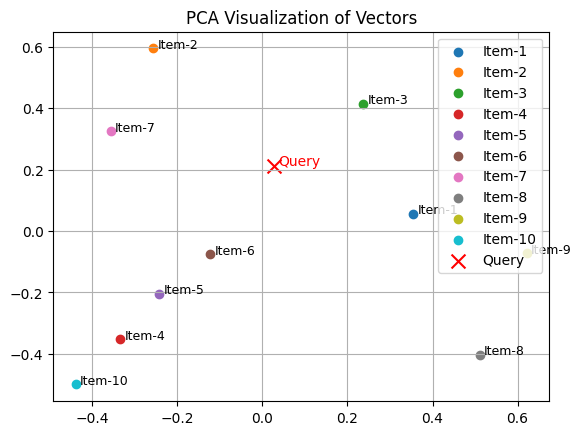

In [5]:
def visualize_pca(db, query_vector):
    pca = PCA(n_components=2)
    all_vectors = db.vectors + [query_vector]
    transformed = pca.fit_transform(all_vectors)
    
    # Plot DB vectors
    for i, point in enumerate(transformed[:-1]):
        plt.scatter(point[0], point[1], label=db.labels[i])
        plt.text(point[0]+0.01, point[1], db.labels[i], fontsize=9)
    
    # Plot Query vector
    query_point = transformed[-1]
    plt.scatter(query_point[0], query_point[1], color='red', marker='x', s=100, label="Query")
    plt.text(query_point[0]+0.01, query_point[1], "Query", fontsize=10, color='red')
    
    plt.title("PCA Visualization of Vectors")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_pca(db, query)


# Use with SentenceTransformer

In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
db = TinyVectorDB()
# Add only sentence-transformer embeddings
sentences = [
    "The cat is sleeping",
    "The dog barks",
    "The sun is bright",
    "He plays football",
    "She loves painting",
    "Birds are flying",
    "The car is fast",
    "He is coding",
    "Music is soothing",
    "The food tastes great"
]

for sentence in sentences:
    embedding = model.encode(sentence, convert_to_numpy=True)
    db.add_vector(embedding, sentence)

# Query
query = model.encode("Dog barking", convert_to_numpy=True)
results = db.search(query, top_k=3)

for label, score in results:
    print(f"{label} - Similarity: {score}")



2025-06-26 19:04:42.467033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750964682.711559      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750964682.790065      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The dog barks - Similarity: 0.7882999777793884
Music is soothing - Similarity: 0.24719999730587006
The cat is sleeping - Similarity: 0.12060000002384186
